# <font size = 5 color="darkblue" face="centaur">WHERE DO WE GATHER APP</font>

## Capstone Project on IBM Data Science, Week 4 & 5

### by Leon Koltun     
_11-11-2019_

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
## Table of Contents
#### [Intro](#section1)
####  [Solution](#section2)
#### [Methodology](#section3)
####  [Model](#section4)
####  [Conclusion](#section6)
####  [Data Sources](#section7)
</font>
</div>

##   <a id="section1">1. Introduction/Business Problem </a>

<font size="5" face="centaur" color="darkblue">
Each year many Canadian companies conduct corporate meetups for their teams and stuff members for various purposes – celebrate a milestone, make an important announcement, discuss latest news, teambuilding activities, just afterwork/weekend fun etc. 
    
It became a popular trend to get together outdoors, as it provides an opportunity for people to get out of the dusty cubicles and staffed offices, play sports and team games, refresh and stock up their energies in nature. And it suits corporate low-budget restrictions as well. 

_**But here’s the question**_ – which park to choose? More than that, most people like variety and exploring new places and so they prefer to meet in a new park every time. What comes with a new territory, however, is uncertainty, as organizers are not familiar with every outdoor place out there. More than that, different parks are good for some activities, and not a very good fit for other activities. For example, if a team votes for a marathon day upon their next gathering, the suitable place should be laced with long trails and have washrooms (and possibly showers). And in case of a barbeque event, there should be green lawns equipped with BBQ grills and permitted for fire. Swimming and fishing activities are perfect in waterfront areas. 
<br><br>
One of the determining factors for selecting a place - *what’s around and how far is it?* For instance, after a long day at the beaches, the team might want to have a lunch in the restaurant. The cuisine preference will be also decided by most votes. <br>
There are times however, when event organizers will change course at the last moment and seek for some other option at the last resort. Such as in case of deteriorating weather conditions, when it becomes obvious it’s going to rain, but taking a ‘rain-check’ is not an option, as all plans were made in advance. In such a case the planners will have to quickly come up with an alternative solution, by throwing another vote among the team and then promptly explore various other venues, according to the decided criteria. <br>

The App might be a nice assistant to Greater Toronto Area (GTA) corporations, that nourish a culture of team building and employee engagement.
</font>

## <a id='section2'>2. Solution</a>

<font size="5" face="centaur" color="darkblue">
The overview of the solution is presented in a following way: <br>   
The planning committee will collect the votes of all participating employees in terms of the area to explore, the type of activity and ‘afterparty lunch’.
The preferences, receiving most votes, will be loaded into a function as input parameters, and the function will output a list of most suitable outdoor places (by default) to go, within a radius chosen. It will be sorted by distance range. <br>
Comments from users will render essential information in terms of general user experience and what can be done in that place. The assumption is that an advice from unknown user is trusted. <br>
In case of changing weather conditions, the function will be run again with a new set of input parameters.
The output report will present the data in a table format and as a map with recommended places on it, for easier orientation. Each place will be associated with a particular group (cluster), that was classified by Machine Learning algorithm.
</font>

##   <a id="section3">3. Methodology</a> 

<font size="5" face="centaur" color="darkblue">
The Analytic Approach we're going to implement is Classification algorithm to divide the output to 4 distinct clusters. Let's examine the data to see what these clusters might be
</font>    

### <font size="5" color="darkblue" face='centaur'>3.1 Data</font>

<font size="5" face="centaur" color="darkblue">
For the phase I of the project, we'll download the Greater Toronto Area (GTO) geolocation Data from Wikipedia. It will give us the Postal Code, Borough and Neighborhood names.
    
Then we'll use the geolocation data csv file with Latitude and Longitude for each Postal Code.
Finally, the FourSquare json will be used to provide us with specific attributes about outdoor places/parks in a certain vicinity and various attractions/places of interest within a desirable radius around these parks. The other categories can be selected as well, but it is outside of the scope of this project, and outdoor category is chosen by default. <br> 
    
In general, the App should work for every geolocation around the world and not limited to Toronto only. However, for the sake of this Project Phase I - we're going to be contended with TO, Ontario data only.    
</font>    

#### <font size="4.5" face="centaur" color="darkblue">3.1.1 Geolocation Data using FourSquare services </font>

<font size="5" face="centaur" color="darkblue">
In order to solve this business need, we will employ the FourSquare services for location data usage and crowdsourced recommendations. These are the specific attributes that will be used in the App:

1. explore nearby venues (Parks, Restaurants with variety of cuisine, Coffee Shops, Pizza places etc)
2. tips from other users
</font>

#### <font size="4.5" color="darkblue" face='centaur'>3.1.2 Input Parameters</font>

<font size="5" face="centaur" color="darkblue">
    
1. starting location point, such as Address, Area name, Neighborhood
    
1. lookup radius, for search of parks and other outdoor places, in meters

1. lunch category (Restaurant, Coffee Shop, Pizza Place etc.), and a desirable cuisine

1. second lookup radius for a lunch, in meters

</font>    

#### <font size="4.5" color="darkblue" face='centaur'>3.1 Analytic Approach</font>

<font size="5" face="centaur" color="darkblue">
There's going to be needed a classification of the places to go after the main activity in the outdoor area, such as place for a full-bodied lunch, or just a snack or a drink, or a different type of place altogether, such as museum etc. in case of rain. Since the demographic diversity of Toronto is quite rich, it might suggest right of a bat that a variety of cuisines to choose for a lunch can be abundant, and additional classification might be needed in terms of narrowing down choices of a restaurant to gather after a park. <br>
A few various classification methods will be used to determine which is the best Machine Learning algorithm for a task.   
</font>

#### <font size="4.5" color="darkblue" face='centaur'>3.1.3 Data Collection & Wrangling</font>

#### <font size="4.5" face="centaur" color="darkblue">Import & Install modules, set options:</font>    

In [1242]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes    
from geopy.geocoders import Nominatim        # convert an address into latitude and longitude values
import requests                              # library to handle API calls
import urllib.request as req                 # library to handle HTML 
from bs4 import BeautifulSoup                # library for Web Scraping
from pandas.io.json import json_normalize    # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium                                # map rendering library

print('Libraries imported.')

Libraries imported.


#### <font size="4.5" face="centaur" color="darkblue">Download data from Wikipedia:</font>     

In [1243]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df = pd.read_html(url,header=0)[0]   #1st table only

In [1244]:
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [1245]:
## sorting out the df by Postcode and cleaning 'Not assigned Boroughs':
TO_df = pd.DataFrame(df.sort_values(['Postcode']))
TO_df = TO_df[TO_df['Borough']!='Not assigned']
## reset index:
TO_df = TO_df.reset_index(drop=True)

In [1246]:
# let's take a look at the data now:
TO_df.head(10)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,Malvern
1,M1B,Scarborough,Rouge
2,M1C,Scarborough,Port Union
3,M1C,Scarborough,Rouge Hill
4,M1C,Scarborough,Highland Creek
5,M1E,Scarborough,West Hill
6,M1E,Scarborough,Morningside
7,M1E,Scarborough,Guildwood
8,M1G,Scarborough,Woburn
9,M1H,Scarborough,Cedarbrae


In [1247]:
# looks better. Let's replace 'Not assigned Neighbourhoods' with corresponding Borough:
for i in range(TO_df.shape[0]):
    if TO_df.loc[i,'Neighbourhood']=='Not assigned':
        TO_df.loc[i,'Neighbourhood'] = TO_df.loc[i,'Borough']
        
# maiking sure there are no 'Not assigned' rows left:        
TO_df[TO_df['Neighbourhood']=='Not assigned']

,Postcode,Borough,Neighbourhood


In [1249]:
#Let's see how many records we've got:
print(TO_df.tail(10))
print('\n')
print('the number of records:',TO_df.shape[0])

    Postcode    Borough      Neighbourhood
200  M9R      Etobicoke  Kingsview Village
201  M9V      Etobicoke  South Steeles    
202  M9V      Etobicoke  Silverstone      
203  M9V      Etobicoke  Albion Gardens   
204  M9V      Etobicoke  Beaumond Heights 
205  M9V      Etobicoke  Humbergate       
206  M9V      Etobicoke  Jamestown        
207  M9V      Etobicoke  Mount Olive      
208  M9V      Etobicoke  Thistletown      
209  M9W      Etobicoke  Northwest        


the number of records: 210


In [1250]:
# looks good, but we have a problem - some Neighbourhoods assigned to the same Postcode.
# Let's flatten it,  making the postal code unique. 
# Group rows with the same Postal Code, and make a comma-separated string of Neighbourhoods:
TO_grouped = pd.DataFrame(TO_df.groupby(['Postcode'])['Neighbourhood'].apply(', '.join))

# add 'Borough' column to a grouped dataset
TO_final = pd.merge(TO_grouped, TO_df['Borough'],left_on=TO_grouped.index, right_on=TO_df['Postcode'])

# rearrange and rename columns:
fixed_cols = list([TO_final.columns[0]] + [TO_final.columns[2]] + [TO_final.columns[1]])
TO_final = TO_final[fixed_cols]
TO_final.rename(columns={'key_0':'Postcode'},inplace=True)

# remove duplicate rows:
TO_final.drop_duplicates(inplace=True)

# let's take a look:
print(TO_final.head())
print(TO_final.shape)

  Postcode      Borough                           Neighbourhood
0  M1B      Scarborough  Malvern, Rouge                        
2  M1C      Scarborough  Port Union, Rouge Hill, Highland Creek
5  M1E      Scarborough  West Hill, Morningside, Guildwood     
8  M1G      Scarborough  Woburn                                
9  M1H      Scarborough  Cedarbrae                             
(103, 3)


##### <font size="4.5" face="centaur" color="darkblue">Now we have Postcode as a unique key and only 103 records</font>    

#### <font size="4.5" face="centaur" color="darkblue">Adding Geospatial Data</font>    

In [1251]:
# load Latitude and Longitude values for each Borough:
#!wget -O Geospatial_Coordinates.csv https://cocl.us/Geospatial_data
Postal_codes = pd.read_csv('Geospatial_Coordinates.csv')

In [1252]:
# sort and rename columns:
Postal_codes = Postal_codes.sort_values('Postal Code').rename(columns={'Postal Code':'Postcode'})
Postal_codes.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [1253]:
# let's now join the two dataframes together on Postal code column:
TO_geo_df = pd.merge(TO_final, Postal_codes, on='Postcode',sort=True, how='left', validate="one_to_one")
TO_geo_df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Port Union, Rouge Hill, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"West Hill, Morningside, Guildwood",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [174]:
# Note: remember those times when you could run API call with some address to Nominatim and get 
# the coordinates in response? These times gone, and Google also charges for its services...
# So, for now let's just manually type the location of Toronto, however the following loop below used to return
# just that - latitude and longitude

from geopy.geocoders import Nominatim
g = Nominatim(user_agent="to_explorer")
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  location = g.geocode('Toronto, Ontario')
  lat = location.latitude
  lng = location.longitude  

print ('latitude is {} and longitude is {}'.format(latitude,longitude))

GeocoderUnavailable: Service not available

In [1254]:
# Toronto coordinates:
latitude = 43.6529
longitude = -79.3849

# let's create map of Toronto with all neighbourhoods marks using latitude and longitude values
map_TO = folium.Map(location=[latitude, longitude], zoom_start=11)

# and add markers to map
for lat, lng, borough in zip(TO_geo_df['Latitude'], TO_geo_df['Longitude'], TO_geo_df['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='pink',
        fill=True,
        fill_color='#3186cd',
        fill_opacity=0.7,
        parse_html=False).add_to(map_TO)

In [1255]:
map_TO

In [1256]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### <font size="4.5" face="centaur" color="darkblue"><u>Note:</u> We'll need to define Foursquare Credentials and Version, so it will be done in undisclosed manner.
</font>    

In [1257]:
# It would be good to have a list of all Outdoor categories FourSquare can provide for the main activity venue:
url2 = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'. \
    format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION) 
        
cats = requests.get(url2).json()
all_cats_df = json_normalize(cats['response']['categories'])
outdoors_categories = []
for i in range(len(all_cats_df['categories'][5])):
    outdoors_categories.append(all_cats_df['categories'][5][i]['name'])

In [1258]:
# So now we have the names of all possible outdoor places, in one list:
print(outdoors_categories)

['Athletics & Sports', 'Bathing Area', 'Bay', 'Beach', 'Bike Trail', 'Botanical Garden', 'Bridge', 'Campground', 'Canal Lock', 'Canal', 'Castle', 'Cave', 'Cemetery', 'Dive Spot', 'Dog Run', 'Farm', 'Field', 'Fishing Spot', 'Forest', 'Fountain', 'Garden', 'Gun Range', 'Harbor / Marina', 'Hill', 'Hot Spring', 'Indoor Play Area', 'Island', 'Lake', 'Lighthouse', 'Mountain Hut', 'Mountain', 'National Park', 'Nature Preserve', 'Other Great Outdoors', 'Palace', 'Park', 'Pedestrian Plaza', 'Playground', 'Plaza', 'Pool', 'Rafting', 'Recreation Center', 'Reservoir', 'River', 'Rock Climbing Spot', 'Roof Deck', 'Scenic Lookout', 'Sculpture Garden', 'Ski Area', 'Skydiving Drop Zone', 'Stables', 'State / Provincial Park', 'States & Municipalities', 'Summer Camp', 'Trail', 'Tree', 'Vineyard', 'Volcano', 'Waterfall', 'Waterfront', 'Well', 'Windmill']


In [1014]:
# Just in case we'll need food categories, and even various cuisines, we can extract those as well:
food_categories = []
for i in range(len(all_cats_df['categories'][3])):
    food_categories.append(all_cats_df['categories'][3][i]['name'])   # 4th Category is Food
print('All Food Categories: ',food_categories)
print('\n')

asian_food = []
for i in range(len(all_cats_df['categories'][3][3]['categories'])):
    asian_food.append(all_cats_df['categories'][3][3]['categories'][i]['name'])  # 4th sub-Category is Asian food    
print('Asian Cuisine:',asian_food)    

All Food Categories:  ['Afghan Restaurant', 'African Restaurant', 'American Restaurant', 'Asian Restaurant', 'Australian Restaurant', 'Austrian Restaurant', 'BBQ Joint', 'Bagel Shop', 'Bakery', 'Belgian Restaurant', 'Bistro', 'Breakfast Spot', 'Bubble Tea Shop', 'Buffet', 'Burger Joint', 'Cafeteria', 'Café', 'Cajun / Creole Restaurant', 'Caribbean Restaurant', 'Caucasian Restaurant', 'Coffee Shop', 'Comfort Food Restaurant', 'Creperie', 'Czech Restaurant', 'Deli / Bodega', 'Dessert Shop', 'Diner', 'Donut Shop', 'Dumpling Restaurant', 'Dutch Restaurant', 'Eastern European Restaurant', 'English Restaurant', 'Falafel Restaurant', 'Fast Food Restaurant', 'Fish & Chips Shop', 'Fondue Restaurant', 'Food Court', 'Food Stand', 'Food Truck', 'French Restaurant', 'Fried Chicken Joint', 'Friterie', 'Gastropub', 'German Restaurant', 'Gluten-free Restaurant', 'Greek Restaurant', 'Halal Restaurant', 'Hawaiian Restaurant', 'Hot Dog Joint', 'Hungarian Restaurant', 'Indian Restaurant', 'Irish Pub', 'It

#### <font size="4.5" face="centaur" color="darkblue">In order to find all venues of specific category, we'll create a function:</font>     

In [1261]:
def getNearbyVenues(latitude, longitude, venue=outdoors_categories, radius=120000, limit=100):
    """ returns a list of Venues of a specified Category (Outdoor places by default), around the given radius\
    from the starting point(latitudes, longitudes). The list includes the distance between the starting point and a Park.
    """
    
    venues_list=[]
            
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'. \
        format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            radius, 
            limit)

    # make API call:
    results = requests.get(url).json()["response"]['groups'][0]['items']

    # return only relevant information for each nearby venue
    venues_list.append([(
        v['venue']['id'], 
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['location']['distance'],
        v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [
                  'Venue ID', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Distance', 
                  'Venue Category']
    
    return(nearby_venues[nearby_venues['Venue Category'].isin(venue)])

#### <font size="4.5" face="centaur" color="darkblue">Let's now explore one large Toronto Borough with this function, to see how it works. So, we're looking for any outdoor place in Woburn, Scarborough
</font>    

In [1139]:
Scarb = getNearbyVenues(43.770992, -79.216917)

In [1403]:
Scarb.drop('Venue ID',axis=1)

,Venue,Venue Latitude,Venue Longitude,Venue Distance,Venue Category,Venue Tips,Distance Range
0,Toronto Pan Am Sports Centre,43.790623,-79.193869,2864.0,Athletics & Sports,HUGE gym. And really clean change rooms. From a regular Goodlife Fitness enthusiast — I wasn't too impressed with the Sunday morning glasses. Awesome rock climbing area and huge running track.,1
1,Port Union Waterfront Park,43.774967,-79.134393,6648.0,Park,Trails not maintained during the winter. If there's not too much snow (in the winter) its ideal for a nice quiet walk along the lake. Trail now runs from West of Highland Credit to the Rouge River.,1
3,Scarborough Bluffs,43.707780,-79.237239,7224.0,Beach,"How to get to the bluffs? Drive to the end of Cecil Crescent. Once you find the children's playground, walk as far as you can into the park hop over the fence, and be rewarded with this epic view.",2
5,Sunnybrook Park,43.722317,-79.355496,12391.0,Other Great Outdoors,Bring your dog. Theres a nice off leash area. Dog playground!,2
6,Edwards Gardens,43.733574,-79.358329,12109.0,Park,"Great spot for a date, or family outing! Bring the kids to the greenhouse, and walk up one of the paths uphill for quieter spots to beat the crowd. Bring your own food though, the cafe is overpriced.",2
8,Woodbine Beach,43.663112,-79.306374,14000.0,Beach,"I don't like lake beaches much, but I have to say here is quite nice. If you are in one part of the beach full of rocks, just keep walking and it will get better.",2
10,Riverdale Park East,43.669951,-79.355493,15836.0,Park,"Lovely sunsets. Grew up around here so it's very sentimental to me. During summertime you can lay on the hill or run around the track, play baseball, soccer, etc. Wintertime is for sledding! Love it.",3
13,Sherwood Park,43.716551,-79.387776,15017.0,Park,Amazing off leash dog walking path. Nice playground or kids. very clean. Lovely place!,3
26,Withrow Park,43.674899,-79.348437,15045.0,Park,"Theatre in the park during the summer evenings, dedicated section for a dog park, located in a very family-oriented neighbourhood",3
31,Riverdale Park West,43.666048,-79.360941,16454.0,Park,Watch for early spring flooding on the path to the Don Valley Footbridge. Call 311 for more information twitter @311Toronto or send email 311@toronto.ca,3


#### <font size="4.5" face="centaur" color="darkblue">and now we can visualize it on Toronto's map</font>    

In [1264]:
# Scarborough coordinates:
latitude =   43.622112
longitude = -79.160497

map_Scarb = folium.Map(location=[latitude, longitude], zoom_start=11)

# and add outdoor places to the map
for lat, lng, venue, category in zip(Scarb['Venue Latitude'], Scarb['Venue Longitude'],\
                                     Scarb['Venue'], Scarb['Venue Category']):
    label = '{} - {}'.format(venue, category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cb',
        fill_opacity=0.2,
        parse_html=True).add_to(map_Scarb)

map_Scarb    

<font size="5" face="centaur" color="darkblue">

<u>Note:</u> The tips other users shared visiting various parks can serve as a valuable feedback,that can play pivotal role in chosing the park, however, the data provided by FourSquare limited to only one Tip per Venue, so we'll extract it via API call separately into a new column:
</font> <br>

In [1273]:
Scarb['Venue Tips'] = ''
for venue_id,venue_name in zip(Scarb['Venue ID'], Scarb['Venue']):
    url3 = 'https://api.foursquare.com/v2/venues/' + str(venue_id) + '/tips?client_id={}&client_secret={}&v={}'. \
                                     format(CLIENT_ID, CLIENT_SECRET, VERSION)
    results = requests.get(url3).json()
    Scarb.loc[Scarb['Venue']==venue_name,'Venue Tips'] = results['response']['tips']['items'][0]['text']

KeyError: 'tips'

In [1282]:
Scarb

,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Distance,Venue Category,Venue Tips
0,542858a0498e22b7cfa91070,Toronto Pan Am Sports Centre,43.790623,-79.193869,2864.0,Athletics & Sports,HUGE gym. And really clean change rooms. From a regular Goodlife Fitness enthusiast — I wasn't too impressed with the Sunday morning glasses. Awesome rock climbing area and huge running track.
1,4bca55e2511f9521b0a7afc7,Port Union Waterfront Park,43.774967,-79.134393,6648.0,Park,Trails not maintained during the winter. If there's not too much snow (in the winter) its ideal for a nice quiet walk along the lake. Trail now runs from West of Highland Credit to the Rouge River.
3,4d1e59975c4ca1cd8cef8f3d,Scarborough Bluffs,43.707780,-79.237239,7224.0,Beach,"How to get to the bluffs? Drive to the end of Cecil Crescent. Once you find the children's playground, walk as far as you can into the park hop over the fence, and be rewarded with this epic view."
5,4bcb17a7cc8cd13a0ca5becf,Sunnybrook Park,43.722317,-79.355496,12391.0,Other Great Outdoors,Bring your dog. Theres a nice off leash area. Dog playground!
6,4bd631a75631c9b6998fa530,Edwards Gardens,43.733574,-79.358329,12109.0,Park,"Great spot for a date, or family outing! Bring the kids to the greenhouse, and walk up one of the paths uphill for quieter spots to beat the crowd. Bring your own food though, the cafe is overpriced."
8,4ada281ef964a520441f21e3,Woodbine Beach,43.663112,-79.306374,14000.0,Beach,"I don't like lake beaches much, but I have to say here is quite nice. If you are in one part of the beach full of rocks, just keep walking and it will get better."
10,4ba5a1e2f964a5202b1839e3,Riverdale Park East,43.669951,-79.355493,15836.0,Park,"Lovely sunsets. Grew up around here so it's very sentimental to me. During summertime you can lay on the hill or run around the track, play baseball, soccer, etc. Wintertime is for sledding! Love it."
13,4ba011c2f964a5204a5737e3,Sherwood Park,43.716551,-79.387776,15017.0,Park,Amazing off leash dog walking path. Nice playground or kids. very clean. Lovely place!
26,4bf079c06f8aa59336f2c13c,Withrow Park,43.674899,-79.348437,15045.0,Park,"Theatre in the park during the summer evenings, dedicated section for a dog park, located in a very family-oriented neighbourhood"
31,4bb63b82941ad13a5e181fe3,Riverdale Park West,43.666048,-79.360941,16454.0,Park,Watch for early spring flooding on the path to the Don Valley Footbridge. Call 311 for more information twitter @311Toronto or send email 311@toronto.ca


#### <font size="4.5" face="centaur" color="darkblue">So, let's select the park!</font>        

In [1291]:
# Scarborough coordinates:
latitude = 43.799525
longitude = -79.387038

# The map of Scarborough using latitude and longitude values
map_Scarb = folium.Map(location=[latitude, longitude], zoom_start=11)

# and add restaurants to map
for lat, lng, venue, category in zip(Scarb['Venue Latitude'], Scarb['Venue Longitude'], \
                                     Scarb['Venue'], Scarb['Venue Category']):
    label = '{} - {}'.format(venue, category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cd',
        fill_opacity=0.5,
        parse_html=False).add_to(map_Scarb)

In [1293]:
map_Scarb

<font size="5" face="centaur" color="darkblue">
And now let's pick one park for out next get-together - we might look for a spacious open park,  
which will accomodate for a long walk and rather informal discussion where we're heading as a company. Reviewing the tips
from other visitors, "Earl Bales Park", index 49, fits the bill.
Checking the lunch options within its vicinity can help pin it down to our schedule as a final pick, or we can 
consider other places
But here's the question - where do we want to go after the walk in the park? There are so many choices and varieties, a light snack,a drink,whole lunch...and adding the distance to the mix - it can be one daunting task to pick a right place.  <br>
For this end, we are going to build a Model that will help us to make a quick decision    
</font>

##   <a id="section4">4. Model</a> 

#### <font size="4.5" face="centaur" color="darkblue">To take care of the distance from park to a restaurant, we divide the distances into 3 distinct groups:
short range = 1 <br>
mid range = 2<br>
long range = 3<br></font>

In [1296]:
max_distance = Scarb['Venue Distance'].max()
Scarb['Distance Range'] = Scarb['Venue Distance'].apply(lambda x: 1 if x <= max_distance/3 \
                                        else(2 if (x > max_distance/3) & (x < max_distance *2/3) else 3))

#### <font size="5" face="centaur" color="darkblue">4.1 Clustering Model Dataset</font>    




In [1312]:
#create an empty Model dataset for clustering
model_df['Food'] = [0]*len(unique_category)
model_df['Lunch'] = [0]*len(unique_category)
model_df['Cuisine'] = [0]*len(unique_category)

In [1313]:
# assiciate Categories to appropriate classification features, by assigning 1 flag to all relevant cells
model_df.loc[model_df['Category'].str.contains(\
                             'Restaurant|Diner|Gastropub|Bar|Pizza|Coffee|Sandwich|Steakhouse|Café|BBQ|Pub|Bakery' \
                             ,regex=True, case=False),'Food'] = 1

In [1314]:
model_df.loc[model_df['Category'].str.contains('Restaurant|Diner|Gastropub|Pizza|Steakhouse|BBQ'\
                             ,regex=True, case=False),'Lunch'] = 1

#### <font size="4.5" face="centaur" color="darkblue">4.1.1 Toronto cultural demographics</font>    


##### <font size="4.5" face="centaur" color="darkblue">Note: Before building the classification model, let's consider the ethnic diversity of Toronto, as a food variety its direct derivation. To do that, we'll scrape some stats from Wikipedia
</font>    

In [1315]:
from bs4 import BeautifulSoup                     # web scraping library
import urllib.request as req  
url = 'https://en.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity'
page = req.urlopen(url)
soup = BeautifulSoup(page)
table_classes = {"class": ["sortable"]}
tables = soup.find_all("table", table_classes)

In [1316]:
# finding the right table
right_table = soup.find_all('table', class_="wikitable sortable")
# create 5 lists, one for each column
A=[]
B=[]
C=[]
D=[]
E=[]

for row in right_table[1].find_all("tr"):          # for each <tr> tag, [1] is the index of our table
    cells = row.findAll('td')                      # for each <td> tag
    if len(cells)==5:                              #Only extract table body not heading
        A.append(cells[0].find(text=True))         # populate the lists    
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))

In [1317]:
# convert these lists to columns of dataframe:
df=pd.DataFrame(A,columns=['Top 20 Ethnic origins'])
df['Population']=B
df['Percentage']=C
df['Riding with Highest Concentration']=D
df['Percentage of Riding']=E

# remove Totals row
df = df.iloc[:-1]   

# stripping of comma symbols and converting string to int:
df['Population'] = df['Population'].str.replace(',','').astype(int)
df['Percentage'] = df['Percentage'].str.replace('\n','').astype(float)
df['Percentage of Riding'] = df['Percentage of Riding'].str.replace('< ','').astype(float)

#### <font size="4.5" face="centaur" color="darkblue">Visualization of Toronto ethnic diversity</font>    

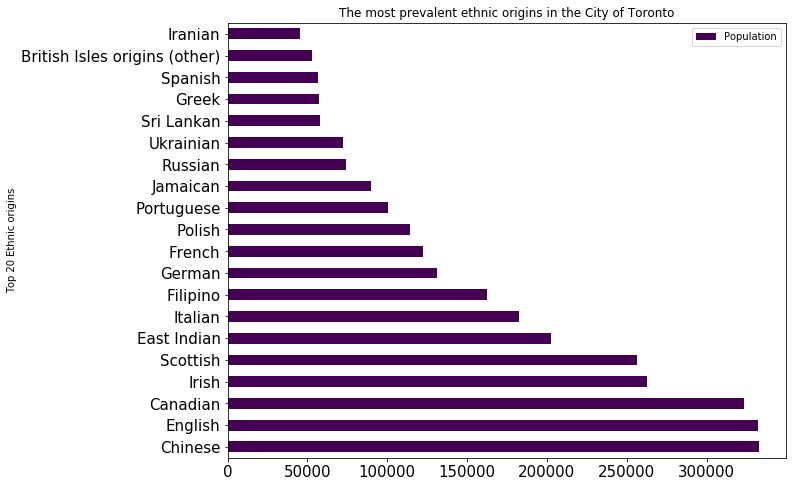

In [1318]:
df.plot(kind='barh',x='Top 20 Ethnic origins', y='Population'.format(1000,','), figsize=(10,8),\
        title='The most prevalent ethnic origins in the City of Toronto',
        colormap='viridis',
        fontsize=15)

<font size="5" face="centaur" color="darkblue">
It's becoming evident an Asian, Canadian/English and Scotish/Irish populations prevails in Toronto, so is the probability of correspoding cuisines for main preference. There's also a tangible presence of East & West European cultures.
</font>    

In [1320]:
# group all Restaurant categories into 'parent' cuisines
asian_food = ['Ramen Restaurant', 'Cambodian Restaurant', 'Satay Restaurant', 'Tibetan Restaurant', \
              'Indonesian Restaurant', 'Korean Restaurant', 'Hong Kong Restaurant', 'Mongolian Restaurant', \
              'Chinese Restaurant', 'Indian Restaurant', 'Burmese Restaurant', 'Hakka Restaurant', \
              'Filipino Restaurant', 'Japanese Restaurant', 'Cantonese Restaurant', 'Vietnamese Restaurant', \
              'Thai Restaurant', 'Asian Restaurant', 'Hotpot Restaurant', 'Himalayan Restaurant', \
              'Malay Restaurant', 'Noodle House', 'Sushi Restaurant']
british_food  = ['Canadian Restaurant', 'British Restaurant','Scotish Restaurant','Irish Restaurant']
west_european = ['Italian Restaurant', 'Greek Restaurant', 'Pizza Place', 'French Restaurant']
east_european = ['Russian Restaurant','Polish Restaurant', 'Ukrainian Restaurant']
american_food = ['American Restaurant','Steakhouse', 'BBQ Joint']
other = ['Seafood Restaurant','Tapas Restaurant','Theme Restaurant', 'Mediterranean Restaurant','Diner',\
         'Mexican Restaurant', 'Middle Eastern Restaurant','Vegetarian / Vegan Restaurant','Restaurant']

# assign all restaurants to a corresponding Cuisine
model_df.loc[model_df['Category'].isin(asian_food),'Cuisine'] = 'Asian'
model_df.loc[model_df['Category'].isin(american_food),'Cuisine'] = 'American'
model_df.loc[model_df['Category'].isin(west_european),'Cuisine'] = 'WestEuropean'
model_df.loc[model_df['Category'].isin(east_european),'Cuisine'] = 'EastEuropean'
model_df.loc[model_df['Category'].isin(other),'Cuisine'] = 'Other'

# assign all light-food place to a corresponding type (using Cuisine column)
coffee = ['Café','Coffee Shop']
drinks = ['Cocktail Bar','Juice Bar']
snacks = ['Bakery','Sandwich Place']
model_df.loc[model_df['Category'].isin(coffee),'Cuisine'] = 'Coffee'
model_df.loc[model_df['Category'].isin(drinks),'Cuisine'] = 'Drinks'
model_df.loc[model_df['Category'].isin(snacks),'Cuisine'] = 'Snacks'

In [1321]:
# run cuisines across with 0/1 dummies
#model_onehot = pd.get_dummies(model_df[['Cuisine']], prefix_sep="")
model_final = model_df[['Food','Lunch']].join(model_onehot)

#### <font size="4.5" face="centaur" color="darkblue">4.2 Examine which Classification model to choose. <br><br>1. KMeans Clustering - let's try it first to see if this unsupervised algorithm can get it right
</font>        

In [1322]:
from sklearn.cluster import KMeans           # import k-means from clustering algorithm library
k = 4                                        # set number of clusters, according to desired outcome of:
# 1 - asian restaurants; 2 - non-asian lunch places; 3 - Light snacks & drinks places; 4 - not Food categories

# fit the Model                                
kmeans = KMeans(n_clusters=k, random_state=0).fit(model_final.loc[:,model_final.columns[:-1]])    

# check cluster labels generated for each row in the dataframe
np.unique(kmeans.labels_)

array([0, 1, 2, 3])

In [1328]:
model_final.insert(0,'Cluster_KM', kmeans.labels_)

In [1329]:
model_final.sort_values('Cluster_KM')

,Cluster_KM,Food,Lunch,Cuisine0,CuisineAmerican,CuisineAsian,CuisineCoffee,CuisineDrinks,CuisineOther,CuisineSnacks,CuisineWestEuropean
0,0,1,1,0,0,0,0,0,1,0,0
26,0,1,1,0,1,0,0,0,0,0,0
39,0,1,1,0,0,0,0,0,0,0,1
23,0,1,1,0,0,0,0,0,1,0,0
19,0,1,1,0,1,0,0,0,0,0,0
18,0,1,1,0,0,0,0,0,0,0,1
44,0,1,1,0,0,0,0,0,1,0,0
29,0,1,1,0,0,0,0,0,1,0,0
50,0,1,1,0,0,0,0,0,0,0,1
51,0,1,1,0,0,0,0,0,1,0,0


<font size="5" face="centaur" color="darkblue">
as we can see, the KMeans identified the underlying logic and classified the dataset to these clusters: <br>
0. non-Asian Restaurants;  
1. Non-Food categories;  
2. Asian Restaurants;
3. Snacks, Coffee and Drinks    
<br><br>    
    
Let's see how will <b>Decision Tree Classifier</b> perform
</font>

In [1330]:
model_final.head(10)

,Cluster_KM,Food,Lunch,Cuisine0,CuisineAmerican,CuisineAsian,CuisineCoffee,CuisineDrinks,CuisineOther,CuisineSnacks,CuisineWestEuropean
0,0,1,1,0,0,0,0,0,1,0,0
1,2,1,1,0,0,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0
5,3,1,0,0,0,0,0,1,0,0,0
6,1,0,0,1,0,0,0,0,0,0,0
7,1,0,0,1,0,0,0,0,0,0,0
8,0,1,1,0,0,0,0,0,1,0,0
9,1,0,0,1,0,0,0,0,0,0,0


#### <font size="4.5" face="centaur" color="darkblue">2. Decision Tree Classifier</font>    

In [1332]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# let's split our dataset to Train and Test subsets, to test the Model:
X = model_final.loc[:,model_final.columns[1:]]
y = model_final['Cluster_KM']                         # comparing the Tree to K-Means results
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X_train,y_train)
yhat = Tree.predict(X_test)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))  

Train set: (52, 10) (52,)
Test set: (13, 10) (13,)
DecisionTrees's Accuracy:  1.0


##### 100% accuracy!! - wow, you can't ask for more than that! 

#### <font size="4.5" face="centaur" color="darkblue">3. Visualization</font>    

In [577]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\leonc\Anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    graphviz-2.38.0            |    h6538335_1011        41.0 MB  conda-forge
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        41.0 MB

The following NEW packages will be INSTALLED:

  graphviz           conda-forge/win-64::graphviz-2.38.0-h6538335_1011
  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_2




graphviz-2.38.0      | 41.0 MB   |            |   0% 
graphviz-2.38.0      | 41.0 MB   |            |   0% 
graphviz-2.38.0      | 41.0 MB   |            |   1% 
graphviz-2.38.0      | 41.0 MB   | 1          |   2% 
graphviz-2.38.0

In [1333]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline 

Text(0.5, 1.0, 'Classification Model of Venues after main activity')

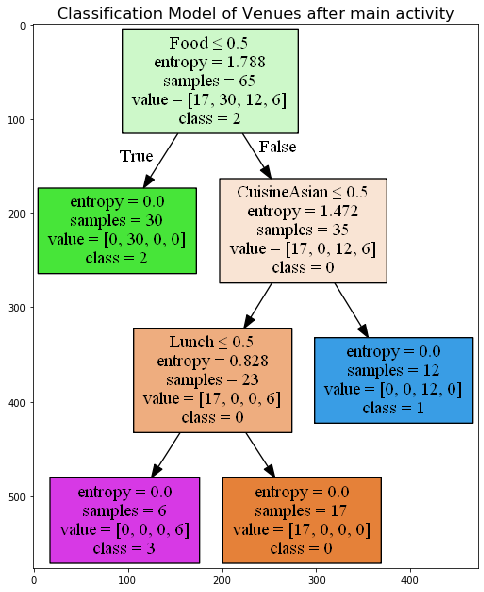

In [1334]:
Tree.fit(X,y)                 # the entire dataset
dot_data = StringIO()
filename = "VenueTree.png"
features = model_final.columns[1:]
targetNames = model_final['Cluster_KM'].unique().astype(str).tolist()
out=tree.export_graphviz(Tree,feature_names=features, out_file=dot_data, class_names= targetNames,\
                         filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(12, 10))
plt.imshow(img,interpolation='nearest')
plt.title('Classification Model of Venues after main activity',\
         {'fontsize': 16,
        'fontweight' : 3,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'})

In [1336]:
# Examining the division shows that it's decided not intirely the way it was designed, but the final result is correct:
#Class 0 - non-asian cuisine = 17; Class 1 - asian cuisine = 12; Class 2 - non-food venues = 30; Class 3- light-snack = 6
model_final['Cluster_KM'].value_counts()

1    30
0    17
2    12
3    6 
Name: Cluster_KM, dtype: int64

In [1396]:
# Let's see how our dataframe looks like now, only without IDs:
Scarb.drop('Venue ID',axis=1)

,Venue,Venue Latitude,Venue Longitude,Venue Distance,Venue Category,Venue Tips,Distance Range
0,Toronto Pan Am Sports Centre,43.790623,-79.193869,2864.0,Athletics & Sports,HUGE gym. And really clean change rooms. From a regular Goodlife Fitness enthusiast — I wasn't too impressed with the Sunday morning glasses. Awesome rock climbing area and huge running track.,1
1,Port Union Waterfront Park,43.774967,-79.134393,6648.0,Park,Trails not maintained during the winter. If there's not too much snow (in the winter) its ideal for a nice quiet walk along the lake. Trail now runs from West of Highland Credit to the Rouge River.,1
3,Scarborough Bluffs,43.707780,-79.237239,7224.0,Beach,"How to get to the bluffs? Drive to the end of Cecil Crescent. Once you find the children's playground, walk as far as you can into the park hop over the fence, and be rewarded with this epic view.",2
5,Sunnybrook Park,43.722317,-79.355496,12391.0,Other Great Outdoors,Bring your dog. Theres a nice off leash area. Dog playground!,2
6,Edwards Gardens,43.733574,-79.358329,12109.0,Park,"Great spot for a date, or family outing! Bring the kids to the greenhouse, and walk up one of the paths uphill for quieter spots to beat the crowd. Bring your own food though, the cafe is overpriced.",2
8,Woodbine Beach,43.663112,-79.306374,14000.0,Beach,"I don't like lake beaches much, but I have to say here is quite nice. If you are in one part of the beach full of rocks, just keep walking and it will get better.",2
10,Riverdale Park East,43.669951,-79.355493,15836.0,Park,"Lovely sunsets. Grew up around here so it's very sentimental to me. During summertime you can lay on the hill or run around the track, play baseball, soccer, etc. Wintertime is for sledding! Love it.",3
13,Sherwood Park,43.716551,-79.387776,15017.0,Park,Amazing off leash dog walking path. Nice playground or kids. very clean. Lovely place!,3
26,Withrow Park,43.674899,-79.348437,15045.0,Park,"Theatre in the park during the summer evenings, dedicated section for a dog park, located in a very family-oriented neighbourhood",3
31,Riverdale Park West,43.666048,-79.360941,16454.0,Park,Watch for early spring flooding on the path to the Don Valley Footbridge. Call 311 for more information twitter @311Toronto or send email 311@toronto.ca,3


#### <font size="4.5" face="centaur" color="darkblue">In order to find the dining places, meeting the search criteria according to the Clustering Model, we'll build the function that takes the Park coordinates, food category (the list of possible categories given in annotation), and distance from the Park. The function will output the list of lunch options within a given radius, based on the clustering done above.
</font>    

In [1368]:
def getFoodVenues(latitude, longitude, food_category='Restaurant', radius=10000, limit=100):
    """ returns a list of Restaurants of a specified Category, around the given radius from the starting
        point(latitude, longitude). The list includes the distance between the starting point and a Restaurant.
        Available food_category items: 
        'Afghan Restaurant', 'African Restaurant', 'American Restaurant', 'Asian Restaurant', 'Australian Restaurant', 
        'Austrian Restaurant', 'BBQ Joint', 'Bagel Shop', 'Bakery', 'Belgian Restaurant', 'Bistro', 'Breakfast Spot', 
        'Bubble Tea Shop', 'Buffet', 'Burger Joint', 'Cafeteria', 'Café', 'Cajun / Creole Restaurant', 'Caribbean Restaurant', 
        'Caucasian Restaurant', 'Coffee Shop', 'Comfort Food Restaurant', 'Creperie', 'Czech Restaurant', 'Deli / Bodega', 
        'Dessert Shop', 'Diner', 'Donut Shop', 'Dumpling Restaurant', 'Dutch Restaurant', 'Eastern European Restaurant', 
        'English Restaurant', 'Falafel Restaurant', 'Fast Food Restaurant', 'Fish & Chips Shop', 'Fondue Restaurant', 
        'Food Court', 'Food Stand', 'Food Truck', 'French Restaurant', 'Fried Chicken Joint', 'Friterie', 'Gastropub', 
        'German Restaurant', 'Gluten-free Restaurant', 'Greek Restaurant', 'Halal Restaurant', 'Hawaiian Restaurant', 
        'Hot Dog Joint', 'Hungarian Restaurant', 'Indian Restaurant', 'Irish Pub', 'Italian Restaurant', 'Jewish Restaurant', 
        'Juice Bar', 'Kebab Restaurant', 'Latin American Restaurant', 'Mac & Cheese Joint', 'Mediterranean Restaurant', 
        'Mexican Restaurant', 'Middle Eastern Restaurant', 'Modern European Restaurant', 'Molecular Gastronomy Restaurant', 
        'Pakistani Restaurant', 'Pet Café', 'Pizza Place', 'Polish Restaurant', 'Portuguese Restaurant', 'Poutine Place', 
        'Restaurant', 'Russian Restaurant', 'Salad Place', 'Sandwich Place', 'Scandinavian Restaurant', 'Scottish Restaurant', 
        'Seafood Restaurant', 'Slovak Restaurant', 'Snack Place', 'Soup Place', 'Southern / Soul Food Restaurant', 
        'Spanish Restaurant', 'Sri Lankan Restaurant', 'Steakhouse', 'Swiss Restaurant', 'Tea Room', 'Theme Restaurant', 
        'Truck Stop', 'Turkish Restaurant', 'Ukrainian Restaurant', 'Vegetarian / Vegan Restaurant', 'Wings Joint'
    """
   
    restaurants_list=[]
    
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'. \
        format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            radius, 
            limit)

        # make API call:
    results = requests.get(url).json()["response"]['groups'][0]['items']

    # return only relevant information for each nearby venue
    restaurants_list.append([(
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['location']['distance'],
        v['venue']['categories'][0]['name']) for v in results])

    nearby_food = pd.DataFrame([item for restaurant_list in restaurants_list for item in restaurant_list])
    nearby_food.columns = [
              'Venue', 
              'Venue Latitude', 
              'Venue Longitude', 
              'Venue Distance', 
              'Venue Category']
# find Cluster that this food category belongs to and return it
    cluster = model_final.loc[model_final['Category']==food_category,'Cluster_KM']
    cuisine = list(model_final.loc[model_final['Cluster_KM']==cluster.iloc[0],'Category'])
    
    return(nearby_food[nearby_food['Venue Category'].isin(cuisine)])

In [1369]:
# So let's see which dining options can the Model find us within 10km from Earl Bales park, using default cuisine:
EarlBales_lat =  43.753043
EarlBales_lng = -79.436228
getFoodVenues(EarlBales_lat, EarlBales_lng)

,Venue,Venue Latitude,Venue Longitude,Venue Distance,Venue Category
3,Auberge du Pommier,43.746962,-79.407879,2378,French Restaurant
11,The Captain's Boil,43.773255,-79.413805,2883,Seafood Restaurant
13,The Keg,43.766579,-79.412131,2454,Steakhouse
20,RH Courtyard Café,43.724874,-79.455536,3499,Restaurant
46,The Abbot,43.703688,-79.413485,5790,Gastropub
54,STACK,43.729311,-79.403241,3743,BBQ Joint
67,Grazie Ristorante,43.709329,-79.398823,5721,Italian Restaurant
69,Sababa,43.795669,-79.434273,4747,Middle Eastern Restaurant
70,La Vecchia Ristorante,43.710167,-79.399086,5630,Italian Restaurant
75,VIA CIBO | italian streetfood,43.754067,-79.357951,6295,Italian Restaurant


#### <font size="4.5" face="centaur" color="darkblue">We searched for a Lunch place with all default parameters of a "Restaurant" within 10km radius from the park, and have received a list of all restaurants that fall into the same Cluster as a "Restaurant".<br><br>Let's now run the model-based function for a different area of Greater Toronto Area and another cuisine, in a radius of 15km.    
</font>    


In [1398]:
#Etobicoke coordinates:
lat = 43.650943
lng = -79.554724
Etobicoke = getNearbyVenues(lat,lng)

In [1399]:
Etobicoke

,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Distance,Venue Category
0,4bcf2c40caff95211a9bccf0,Centennial Park,43.656154,-79.587540,2705,Park
1,4ad4c05ef964a5209ff620e3,High Park,43.646479,-79.463425,7370,Park
3,4c6208cbfa7bc92895620d27,Waterfront Trail,43.635859,-79.467529,7221,Trail
5,4af5b68cf964a520c4fb21e3,Humber Bay Park,43.622396,-79.478389,6922,Park
7,4b93f74df964a5208f5d34e3,Humber River Footbridge,43.631851,-79.471321,7046,Bridge
8,4bc8c23b92b376b0ad21523a,Sunnyside Park,43.636670,-79.461212,7698,Park
9,4b757192f964a520d30c2ee3,Offleash Dog Trail - High Park,43.645485,-79.458747,7754,Dog Run
16,4ad4c05ef964a520bdf620e3,Trinity Bellwoods Park,43.647072,-79.413756,11362,Park
19,4b0afc19f964a520212b23e3,Cedarvale Park,43.692535,-79.428705,11153,Field
21,4ae33298f964a520909121e3,Sorauren Avenue Park,43.648443,-79.443405,8970,Park


#### <font size="4.5" face="centaur" color="darkblue">The following function will get one tip per Venue for a list of found outdoor places
</font>

In [1390]:
def get_tips(borough_df):
    borough_df['Venue Tips'] = ''
    for venue_id,venue_name in zip(borough_df['Venue ID'], borough_df['Venue']):
        url3 = 'https://api.foursquare.com/v2/venues/' + str(venue_id) + '/tips?client_id={}&client_secret={}&v={}'.\
                                         format(CLIENT_ID, CLIENT_SECRET, VERSION)
        results = requests.get(url3).json()
        borough_df.loc[borough_df['Venue']==venue_name,'Venue Tips'] = results['response']['tips']['items'][0]['text']
    return(borough_df)

In [1391]:
get_tips(Etobicoke)

{'meta': {'code': 200, 'requestId': '5dd79985006dce001b84062c'}, 'response': {'tips': {'count': 10, 'items': [{'id': '517585c1e4b0d6868bdfd3f2', 'createdAt': 1366656449, 'text': 'Centennial Park is home to the Centennial Park Conservatory. The three glass houses highlight different and interesting plant collections: tropical, cactus and seasonal displays.', 'type': 'user', 'url': 'http://www.ihg.com/hotelindigo/hotels/us/en/global/neighborhood_guides/toronto-airport-neighborhood-guide', 'canonicalUrl': 'https://foursquare.com/item/517585c1e4b0d6868bdfd3f2', 'lang': 'en', 'likes': {'count': 3, 'groups': [{'type': 'others', 'count': 3, 'items': [{'id': '1114690', 'firstName': 'Alex', 'lastName': 'Saldanha', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/SGHGS0JN0CJ05NVM.jpg'}}]}], 'summary': '3 likes'}, 'logView': True, 'agreeCount': 5, 'disagreeCount': 0, 'todo': {'count': 0}, 'user': {'id': '28986242', 'firstName': 'Hotel Indigo', 'gender': 'none

{'meta': {'code': 200, 'requestId': '5dd799b3df2774001cc3776d'}, 'response': {'tips': {'count': 103, 'items': [{'id': '53e580d0498e4a604fe32878', 'createdAt': 1407549648, 'text': 'Bring your six-pack (of beer) and go directly to the off-leash dog park. Sit at the top of the hill and enjoy your beer. Now consider yourself having earned a true Bellwoods experience.', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/53e580d0498e4a604fe32878', 'lang': 'en', 'likes': {'count': 1, 'groups': [{'type': 'others', 'count': 1, 'items': [{'id': '122854329', 'firstName': 'Henry', 'lastName': 'Seven', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/122854329-XPFRQKH4HHQ32VTR.jpg'}}]}], 'summary': '1 like'}, 'logView': True, 'agreeCount': 5, 'disagreeCount': 0, 'todo': {'count': 0}, 'user': {'id': '8593772', 'firstName': 'Dan', 'lastName': 'Brown', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/8593772-UB4BNXVU

{'meta': {'code': 200, 'requestId': '5dd799aac94979001bc57f62'}, 'response': {'tips': {'count': 27, 'items': [{'id': '56821014498e5235f22e6e2e', 'createdAt': 1451364372, 'text': "Lovely sunsets. Grew up around here so it's very sentimental to me. During summertime you can lay on the hill or run around the track, play baseball, soccer, etc. Wintertime is for sledding! Love it.", 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/56821014498e5235f22e6e2e', 'lang': 'en', 'likes': {'count': 0, 'groups': []}, 'logView': True, 'agreeCount': 2, 'disagreeCount': 0, 'todo': {'count': 0}, 'user': {'id': '123573614', 'firstName': 'Mimi', 'gender': 'female', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/123573614-2MRA42F55DAQNZRC.jpg'}}, 'authorInteractionType': 'liked'}]}}}
{'meta': {'code': 200, 'requestId': '5dd79999b4b684001b7a45b3'}, 'response': {'tips': {'count': 9, 'items': [{'id': '53544cb0498e098f0a6deb27', 'createdAt': 1398033584, 'text': 'Amazing off lea

,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Distance,Venue Category,Venue Tips
0,4bcf2c40caff95211a9bccf0,Centennial Park,43.656154,-79.587540,2705,Park,"Centennial Park is home to the Centennial Park Conservatory. The three glass houses highlight different and interesting plant collections: tropical, cactus and seasonal displays."
1,4ad4c05ef964a5209ff620e3,High Park,43.646479,-79.463425,7370,Park,High park is amazing. Go early to get a good parking spot. Worth the trip if you've never been here and you live in Toronto. Make it a full day experience and explore Runnymede Village as well!
3,4c6208cbfa7bc92895620d27,Waterfront Trail,43.635859,-79.467529,7221,Trail,Westheights Veterinary hospital is one of the most popular local animal hospitals in Kitchener. We provide pet emergency and affordable pet medical facilities. Contact us for more information.
5,4af5b68cf964a520c4fb21e3,Humber Bay Park,43.622396,-79.478389,6922,Park,"Beautiful view of the city, it's a good place to run or just walk around with your dog. Bring bug repellent!"
7,4b93f74df964a5208f5d34e3,Humber River Footbridge,43.631851,-79.471321,7046,Bridge,"Great place for a long ride, walk , run and site see ... Great views of Lake Ontario ..."
8,4bc8c23b92b376b0ad21523a,Sunnyside Park,43.636670,-79.461212,7698,Park,Took my 2 year old here for the first time today - will definitely be back! Great little park and tons of running room for little ones
9,4b757192f964a520d30c2ee3,Offleash Dog Trail - High Park,43.645485,-79.458747,7754,Dog Run,Amazing piece of land in the city to be able to walk your dogs Offleash without confined to a fenced in square flat field
16,4ad4c05ef964a520bdf620e3,Trinity Bellwoods Park,43.647072,-79.413756,11362,Park,Bring your six-pack (of beer) and go directly to the off-leash dog park. Sit at the top of the hill and enjoy your beer. Now consider yourself having earned a true Bellwoods experience.
19,4b0afc19f964a520212b23e3,Cedarvale Park,43.692535,-79.428705,11153,Field,The recently renovated Tennis courts at Cedarvale Park are among the best public courts in the city. Enjoy playing until the late evening (of 11PM) under lights with the gorgeous park surrounding you.
21,4ae33298f964a520909121e3,Sorauren Avenue Park,43.648443,-79.443405,8970,Park,"A gem of a park, on a beautiful west end street. The two tennis courts located on the Northwest end are in very good condition. As is the baseball field, which is often vacant in the summer."


In [1393]:
Etobicoke

,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Distance,Venue Category,Venue Tips
0,4bcf2c40caff95211a9bccf0,Centennial Park,43.656154,-79.587540,2705,Park,"Centennial Park is home to the Centennial Park Conservatory. The three glass houses highlight different and interesting plant collections: tropical, cactus and seasonal displays."
1,4ad4c05ef964a5209ff620e3,High Park,43.646479,-79.463425,7370,Park,High park is amazing. Go early to get a good parking spot. Worth the trip if you've never been here and you live in Toronto. Make it a full day experience and explore Runnymede Village as well!
3,4c6208cbfa7bc92895620d27,Waterfront Trail,43.635859,-79.467529,7221,Trail,Westheights Veterinary hospital is one of the most popular local animal hospitals in Kitchener. We provide pet emergency and affordable pet medical facilities. Contact us for more information.
5,4af5b68cf964a520c4fb21e3,Humber Bay Park,43.622396,-79.478389,6922,Park,"Beautiful view of the city, it's a good place to run or just walk around with your dog. Bring bug repellent!"
7,4b93f74df964a5208f5d34e3,Humber River Footbridge,43.631851,-79.471321,7046,Bridge,"Great place for a long ride, walk , run and site see ... Great views of Lake Ontario ..."
8,4bc8c23b92b376b0ad21523a,Sunnyside Park,43.636670,-79.461212,7698,Park,Took my 2 year old here for the first time today - will definitely be back! Great little park and tons of running room for little ones
9,4b757192f964a520d30c2ee3,Offleash Dog Trail - High Park,43.645485,-79.458747,7754,Dog Run,Amazing piece of land in the city to be able to walk your dogs Offleash without confined to a fenced in square flat field
16,4ad4c05ef964a520bdf620e3,Trinity Bellwoods Park,43.647072,-79.413756,11362,Park,Bring your six-pack (of beer) and go directly to the off-leash dog park. Sit at the top of the hill and enjoy your beer. Now consider yourself having earned a true Bellwoods experience.
19,4b0afc19f964a520212b23e3,Cedarvale Park,43.692535,-79.428705,11153,Field,The recently renovated Tennis courts at Cedarvale Park are among the best public courts in the city. Enjoy playing until the late evening (of 11PM) under lights with the gorgeous park surrounding you.
21,4ae33298f964a520909121e3,Sorauren Avenue Park,43.648443,-79.443405,8970,Park,"A gem of a park, on a beautiful west end street. The two tennis courts located on the Northwest end are in very good condition. As is the baseball field, which is often vacant in the summer."


#### <font size="4.5" face="centaur" color="darkblue">High Park sounds amazing, and the Runnymede Village hint gives a sense of rich gastronomical variety, so let's explore it!</font>    


In [1394]:
#High Park coordinates = 43.646479, -79.463425
HP_lat = 43.646479
HP_lng = -79.463425
getFoodVenues(HP_lat,HP_lng)

,Venue,Venue Latitude,Venue Longitude,Venue Distance,Venue Category
4,Pizzeria Defina,43.648723,-79.449855,1121,Pizza Place
12,nodo,43.665303,-79.465621,2102,Italian Restaurant
13,Indie Alehouse,43.665475,-79.465290,2119,Gastropub
19,Tavoos Restaurant,43.652501,-79.433054,2536,Middle Eastern Restaurant
28,Pizzeria Libretto,43.648979,-79.420604,3460,Pizza Place
33,Bar Isabel,43.654782,-79.420717,3561,Tapas Restaurant
39,Mamakas Taverna,43.646042,-79.419679,3524,Greek Restaurant
55,Le Swan,43.645102,-79.414830,3917,American Restaurant
58,Oyster Boy,43.645124,-79.414259,3963,Seafood Restaurant
63,Bar Raval,43.655904,-79.410125,4419,Tapas Restaurant


#### <font size="4.5" face="centaur" color="darkblue">Very colorful dining life indeed, with Model finding a plethora of worldwide cuisines under the 'non-Asian' cluster.</font>    


##   <a id="section6">6. Conclusion</a> 

<font size="5" face="centaur" color="darkblue">Both Models, K-Means and Decision Tree Classifier reached the same results, while K-Means is unsupervised algorithm. Overall, it makes sense, as the dataset was structured in a very logical way, leaving not many options to other classifications.
    
The next Phase II of this project can be taking the distance ranges into account, providing 3 circles of accessibility to dining places with short, mid and long-range distances from the park. Also, the 'agreeCount' and 'disagreeCount' could be incorporated to weight Tips from other visitors. This feature, however, will make sense to add on commercial application only, as it will necessitate at least the "Start Up Tier" with Foursquare, in order to bypass the 1-tip-per-venue limit.
Next Phases of the project can extend on other territories, provinces and countries, as Foursquare provides worldwide geolocation data. The Park - Restaurant scenario can change into something else, as there's no limitation of Categories within the Application.
</font>

##   <a id="section7">7. Data Sources</a>

1. Foursquare.com
2. Wikipedia

<font size="5" face="centaur" color="darkblue">Thank you for taking this journey with me! I can seehow this project could be a precursor to the huge Data Science undertaking!
</font>    
